#### Problem statement

The dataset consists of data collected from heavy Scania
trucks in everyday usage. The system in focus is the
Air Pressure system (APS) which generates pressurised
air that are utilized in various functions in a truck,
such as braking and gear changes. The datasets'
positive class consists of component failures
for a specific component of the APS system.
The negative class consists of trucks with failures
for components not related to the APS. The data consists
of a subset of all available data, selected by experts.

-- Challenge metric

Cost-metric of miss-classification:

Predicted class | True class |
| pos | neg |
-----------------------------------------
pos | - | Cost_1 |
-----------------------------------------
neg | Cost_2 | - |
-----------------------------------------
Cost_1 = 10 and cost_2 = 500

The total cost of a prediction model the sum of 'Cost_1'
multiplied by the number of Instances with type 1 failure
and 'Cost_2' with the number of instances with type 2 failure,
resulting in a 'Total_cost'.

In this case Cost_1 refers to the cost that an unnessecary
check needs to be done by an mechanic at an workshop, while
Cost_2 refer to the cost of missing a faulty truck,
which may cause a breakdown.

Total_cost = Cost_1*No_Instances + Cost_2*No_Instances.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv(r'C:\Users\MADHU\Downloads\aps scania truck dataset\aps_failure_training_set.csv')

In [3]:
train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [4]:
train.shape

(60000, 171)

In [5]:
test= pd.read_csv(r'C:\Users\MADHU\Downloads\aps scania truck dataset\aps_failure_test_set.csv')

In [6]:
test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [7]:
test.shape

(16000, 171)

In [8]:
df = pd.concat([train,test])
df.reset_index(inplace = True)
df.drop(columns=['index'],inplace=True)
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [9]:
df.shape

(76000, 171)

In [10]:
# define numerical & categorical columns
numeric_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['aa_000']

We have 170 categorical features : ['class', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_

In [11]:
df = df.replace('na',np.nan)

In [12]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,NaN,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
75996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
75997,neg,79636,NaN,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
75998,neg,110,NaN,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [13]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [14]:
for fea in [feature for feature in df.columns if feature not in ['class','aa_000']]:
    try:
        df[fea] = df[fea].astype(int64)
    except:
        df[fea] = df[fea].astype(float)

In [15]:
df.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,7.600000e+04,17308.000000,7.173900e+04,5.715800e+04,72810.000000,72810.000000,7.514000e+04,7.514000e+04,7.514000e+04,7.514000e+04,...,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,7.513700e+04,72514.000000,72515.000000
mean,6.115976e+04,0.725560,3.564398e+08,1.506300e+05,6.736959,10.836314,2.004306e+02,1.204761e+03,9.697328e+03,9.364902e+04,...,4.495763e+05,2.132460e+05,4.506478e+05,4.006204e+05,3.378689e+05,3.475611e+05,1.398968e+05,8.424984e+03,0.085197,0.219044
std,2.647366e+05,3.311913,7.952530e+08,3.590593e+07,153.446469,201.594853,1.843612e+04,5.099091e+04,1.718996e+05,8.244157e+05,...,1.177226e+06,5.518865e+05,1.189909e+06,1.151635e+06,1.097909e+06,1.707593e+06,4.692327e+05,4.875440e+04,4.179600,10.237051
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.600000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.986000e+03,1.184000e+03,2.730000e+03,3.646000e+03,5.300000e+02,1.120000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.081300e+04,0.000000,1.540000e+02,1.280000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.354480e+05,1.126720e+05,2.230020e+05,1.909860e+05,9.353600e+04,4.126000e+04,3.862000e+03,0.000000e+00,0.000000,0.000000
75%,4.884000e+04,0.000000,9.700000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.386740e+05,2.184100e+05,4.676340e+05,4.032900e+05,2.761800e+05,1.680460e+05,1.395000e+05,2.000000e+03,0.000000,0.000000
max,4.294967e+07,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,1.047252e+07,1.914916e+07,7.305747e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,4.215944e+07,1.195801e+08,1.926740e+07,4.570398e+06,482.000000,1720.000000


In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 99.2+ MB


In [18]:
df.isnull().sum()

class         0
aa_000        0
ab_000    58692
ac_000     4261
ad_000    18842
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 171, dtype: int64

In [19]:
df.isnull().sum()[df.isnull().sum()!=0]

ab_000    58692
ac_000     4261
ad_000    18842
ae_000     3190
af_000     3190
          ...  
ee_007      863
ee_008      863
ee_009      863
ef_000     3486
eg_000     3485
Length: 169, dtype: int64

169 features are having null values out of 171 features

In [20]:
#handling the null values 
for fe in [i for i in df.columns if i not in ['class','aa_000']]:
    df[fe] = df[fe].fillna(df[fe].median())

In [21]:
df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

E:\Anaconda_python_programfiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


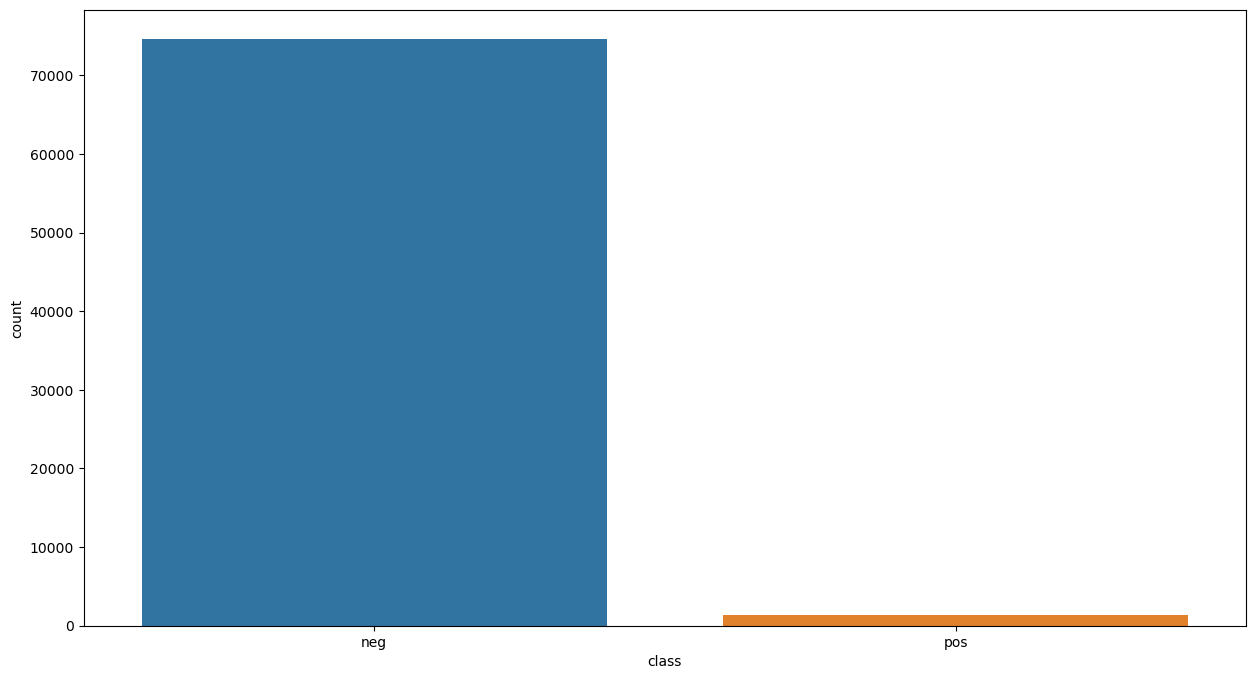

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(df['class'])
plt.show()

In [23]:
data = df.copy()

In [24]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,128.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [25]:
## Converting categorial features to numerical value

data['class'].replace('neg', 0, inplace=True)
data['class'].replace('pos', 1, inplace=True)

In [26]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,128.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,0,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,0,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,0,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [27]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [28]:
X = data.drop('class',axis = 1)
y = data['class']

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
#scaler = StandardScaler() # most of the independent features are not normally distributed
#scaler = MinMaxScaler() # most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [31]:
# balancing the data
from imblearn.combine import SMOTETomek
st = SMOTETomek(random_state=1,sampling_strategy='minority', n_jobs=-1)
X, y = st.fit_resample(X, y)

E:\Anaconda_python_programfiles\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(119275, 170)
(119275,)
(29819, 170)
(29819,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, confusion_matrix



In [36]:
results=dict()
results["Algorithm"]=[]
results["Accuracy"]=[]
results["Precision"]=[]
results['ROC-AUC Curve']=[]

In [37]:
for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    con_m = confusion_matrix(y_test, y_pred)
    c_r = classification_report(y_test, y_pred)
    p_s = precision_score(y_test, y_pred)
    rac = roc_auc_score(y_test, y_pred)
    print(f"Algo: {i}")
    print(f"acc: {acc}\n")
    print("-"*55)
    print(f"{con_m}\n")
    print("-"*55)
    print(f"{c_r}\n")
    results["Algorithm"].append(i)
    results["Accuracy"].append(acc)
    results["Precision"].append(p_s)
    results['ROC-AUC Curve'].append(rac)

Algo: ExtraTreesClassifier()
acc: 0.9943660082497736

-------------------------------------------------------
[[14610   144]
 [   24 15041]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14754
           1       0.99      1.00      0.99     15065

    accuracy                           0.99     29819
   macro avg       0.99      0.99      0.99     29819
weighted avg       0.99      0.99      0.99     29819


Algo: RandomForestClassifier()
acc: 0.995439149535531

-------------------------------------------------------
[[14645   109]
 [   27 15038]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14754
           1       0.99      1.00      1.00     15065

    accuracy                           1.00     29819
   macro avg       1.00      1.00      1.00     29819
wei

In [38]:
for i in [LogisticRegression(),XGBClassifier()]:
  model = i.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  rac = roc_auc_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)
  results['ROC-AUC Curve'].append(rac)

E:\Anaconda_python_programfiles\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Algo: LogisticRegression()
acc: 0.666521345450887

-------------------------------------------------------
[[ 5265  9489]
 [  455 14610]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.36      0.51     14754
           1       0.61      0.97      0.75     15065

    accuracy                           0.67     29819
   macro avg       0.76      0.66      0.63     29819
weighted avg       0.76      0.67      0.63     29819


Algo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_

In [39]:
#test_accuracy
pd.DataFrame(results)

,Algorithm,Accuracy,Precision,ROC-AUC Curve
0,"(ExtraTreeClassifier(random_state=740366502), ...",0.994366,0.990517,0.994323
1,"(DecisionTreeClassifier(max_features='auto', r...",0.995439,0.992804,0.995410
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.976290,0.975998,0.976282
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.983735,0.978849,0.983678
4,LogisticRegression(),0.666521,0.606249,0.663325
5,"XGBClassifier(base_score=None, booster=None, c...",0.997183,0.995174,0.997161


In [40]:
#train accuracy
for i in [XGBClassifier()]:
  model = i.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  acc = accuracy_score(y_train, y_train_pred)
  con_m = confusion_matrix(y_train, y_train_pred)
  c_r = classification_report(y_train, y_train_pred)
  p_s = precision_score(y_train, y_train_pred)
  rac = roc_auc_score(y_train, y_train_pred)  
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)
  results['ROC-AUC Curve'].append(rac)

Algo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
acc: 1.0

-------------------------------------------------------
[[59793     0]
 [    0 59482]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00

In [41]:
#test_accuracy
for i in [XGBClassifier()]:
  model = i.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  rac = roc_auc_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)
  results['ROC-AUC Curve'].append(rac)

Algo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
acc: 0.9971830041248868

-------------------------------------------------------
[[14681    73]
 [   11 15054]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0      

### ROC_AUC CURVE 

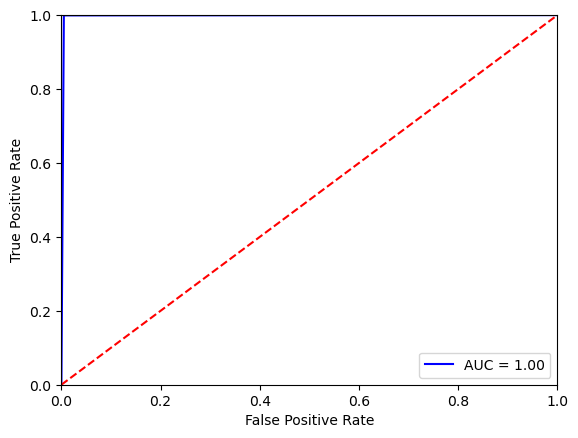

In [42]:
 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc =rac

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [43]:
## Confusion Matrix
conf_mat_xgb=confusion_matrix(y_test,y_pred)
print(conf_mat_xgb)
tp,fp,fn,tn=conf_mat_xgb.ravel()

[[14681    73]
 [   11 15054]]


In [44]:
#Calculating total cost for repairing after implementing XG Boost Classifier model
Total_cost_xgb = 10*fp + 500 *fn
print(f"Total cost of repair after implementing XG_boost model = Rs. {Total_cost_xgb} /-")

Total cost of repair after implementing XG_boost model = Rs. 6230 /-


### The best Model is XGBoost Classifier with 99.7% accuracy and cost for repairing after implementing this model is 6230 /-